---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [1]:
#EDA에 사용할 라이브러리를 import 하세요
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spst

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [3]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
data = pd.read_csv('sbikedata.csv')

In [5]:
data.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [6]:
data.tail()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
5826,2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) :
ㅇ 귀무가설: 강우 여부와 따릉이 대여량 간에는 연관성이 없다.
ㅇ 대립가설: 강우 여부와 따릉이 대여량 간에는 연관성이 있다.

- 가설 2 : 
ㅇ 귀무가설: 온도와 따릉이 대여량 간에는 연관성이 없다.
ㅇ 대립가설: 온도와 따릉이 대여량 간에는 연관성이 있다.

- 가설 3 :
ㅇ 귀무가설: 습도와 따릉이 대여량 간에는 연관성이 없다.
ㅇ 대립가설: 습도와 따릉이 대여량 간에는 연관성이 있다.

- 가설 4 :
ㅇ 귀무가설: 풍속와 따릉이 대여량 간에는 연관성이 없다.
ㅇ 대립가설: 풍속와 따릉이 대여량 간에는 연관성이 있다.

- 가설 5 :
ㅇ 귀무가설: 미세먼지 수치와 따릉이 대여량 간에는 연관성이 없다.
ㅇ 대립가설: 미세먼지 수치와 따릉이 대여량 간에는 연관성이 있다.

- 가설 6 :
ㅇ 귀무가설: 가시성 수치와 따릉이 대여량 간에는 연관성이 없다.
ㅇ 대립가설: 가시성 수치와 따릉이 대여량 간에는 연관성이 있다.

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

2. 변수가 수치형인지 범주형인지


In [18]:
#변수의 자료형을 확인해보세요.
print(data['hour'].info())
print(data['hour'].head())

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB
None
0    1
1    2
2    3
3    4
4    5
Name: hour, dtype: int64


수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [22]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
print(data['hour'].value_counts())
print()
print(data.isnull().sum())

1     243
14    243
23    243
22    243
21    243
20    243
19    243
18    243
17    243
16    243
15    243
13    243
12    243
11    243
10    243
9     243
8     243
7     243
5     243
0     243
2     242
6     242
3     242
4     241
Name: hour, dtype: int64

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64


결측치 없음~

4. 변수의 기초 통계량 확인

In [11]:
#변수의 기초 통계량을 확인해보세요.
data['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

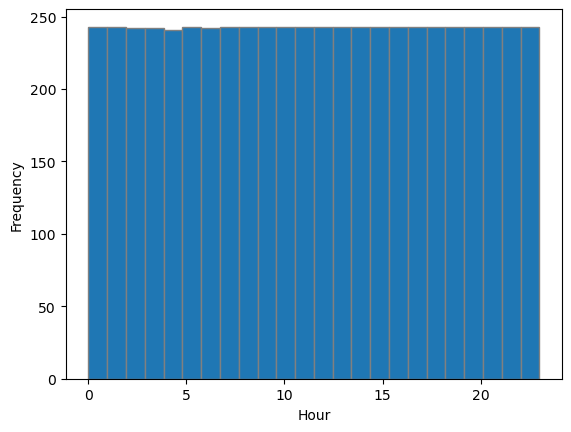

In [16]:
#변수의 분포를 확인해보세요.
plt.hist(data.hour, bins=24, edgecolor='gray')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()


6. 위 정보로 부터 파악한 내용 정리

In [5]:
#위 정보로부터 파악하신 내용을 정리해보세요.

=> 8개월 동안 매일 1시간 단위의 데이터이므로 데이터 개수가 동일
1,2개 차이는 왜 있는건지..?



7. 추가 분석사항 도출

In [7]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

해당 일-시간의 온도

2. 변수가 수치형인지 범주형인지


In [26]:
#변수의 자료형을 확인해보세요.
print(data['temperature'].dtypes)
print(data['temperature'].info())
print(data['temperature'].head())

float64
<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: temperature
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB
None
0    13.1
1    12.4
2    13.1
3    13.0
4    13.0
Name: temperature, dtype: float64


float, 수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [32]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
print(data['temperature'].value_counts())
print()
print(data.isnull().sum())

 21.1    50
 24.1    50
 22.0    45
 20.9    44
 18.8    43
         ..
 34.1     1
 36.1     1
 36.0     1
 35.6     1
-0.8      1
Name: temperature, Length: 377, dtype: int64

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64


결측치 없음

4. 변수의 기초 통계량 확인

In [34]:
#변수의 기초 통계량을 확인해보세요
data['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

최저는 영하 3.5도 최고는 36.3도 중위값 20.4도
50퍼센트가 14 ~ 25 에 존재

5. 변수의 분포 확인

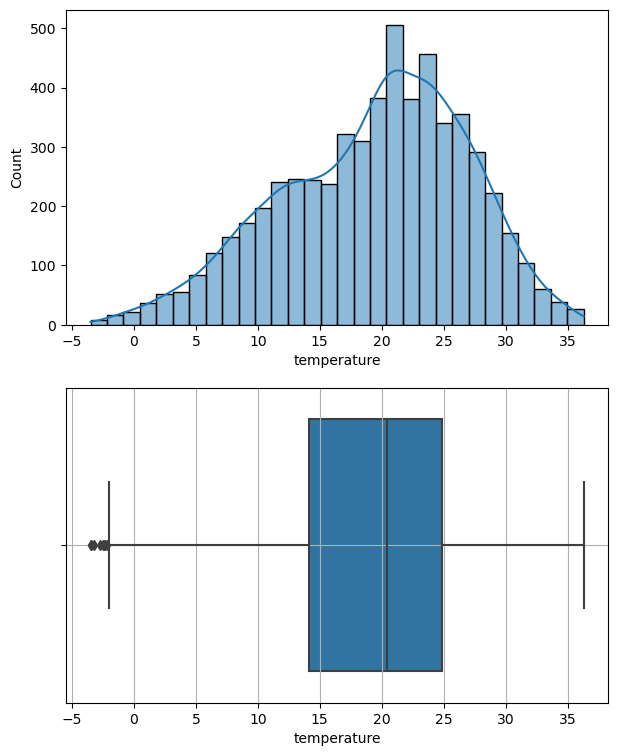

In [39]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(7,9))
plt.subplot(2,1,1)
sns.histplot(x = 'temperature', data = data, bins = 30, kde = True)

plt.subplot(2,1,2)
sns.boxplot(x = 'temperature', data = data)
plt.grid()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

4월 ~ 12월 데이터이므로 14도 ~ 25도 사이에 많이 분포함

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

강우여부

2. 변수가 수치형인지 범주형인지


In [43]:
#변수의 자료형을 확인해보세요.
print(data['precipitation'].info())
print(data['precipitation'].head())
print(data['precipitation'].value_counts())

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: precipitation
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB
None
0    0
1    0
2    0
3    0
4    0
Name: precipitation, dtype: int64
0    5387
1     440
Name: precipitation, dtype: int64


범주형

3. 변수의 결측치 존재 여부 및 조치방안

In [44]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
print(data['precipitation'].value_counts())
print()
print(data.isnull().sum())

0    5387
1     440
Name: precipitation, dtype: int64

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64


결측치 없음

4. 변수의 기초 통계량 확인

In [47]:
#변수의 기초 통계량을 확인해보세요
print(data['precipitation'].value_counts())
print(data['precipitation'].value_counts()/data.shape[0])

0    5387
1     440
Name: precipitation, dtype: int64
0    0.924489
1    0.075511
Name: precipitation, dtype: float64


92.44 % 는 강우 없음, 7.55 % 는 강우 있음

5. 변수의 분포 확인

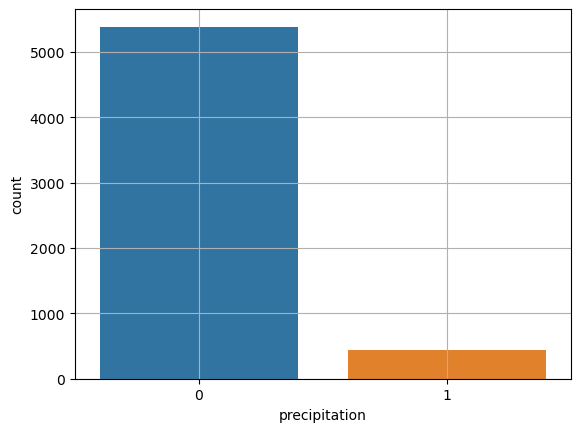

In [49]:
#변수의 분포를 확인해보세요.
sns.countplot(x=data['precipitation'])
plt.grid()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

92.44 % 는 강우 없음, 7.55 % 는 강우 있음
5387건 없음, 440건 있음

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

풍속

2. 변수가 수치형인지 범주형인지


In [51]:
#변수의 자료형을 확인해보세요.
print(data['windspeed'].info())
print(data['windspeed'].head())

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: windspeed
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB
None
0    1.4
1    2.1
2    3.4
3    3.1
4    2.9
Name: windspeed, dtype: float64


수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [53]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
print(data['windspeed'].value_counts())
print()
print(data.isnull().sum())

2.3    255
2.2    246
2.1    242
1.9    239
1.7    235
      ... 
6.9      1
5.8      1
6.8      1
6.4      1
6.2      1
Name: windspeed, Length: 72, dtype: int64

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64


결측치 없음

4. 변수의 기초 통계량 확인

In [54]:
#변수의 기초 통계량을 확인해보세요
data['windspeed'].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

최저는 0, 최고는 8.3
단위는 m/s?

5. 변수의 분포 확인

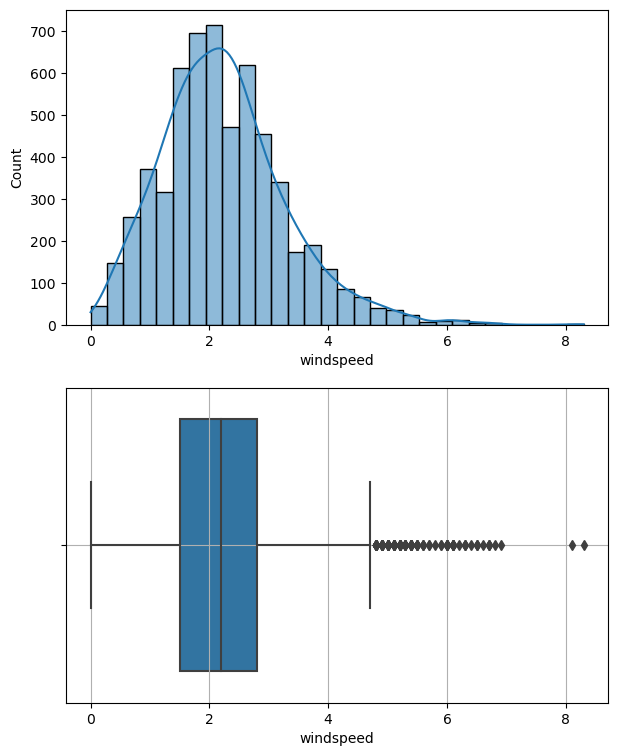

In [55]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(7,9))
plt.subplot(2,1,1)
sns.histplot(x = 'windspeed', data = data, bins = 30, kde = True)

plt.subplot(2,1,2)
sns.boxplot(x = 'windspeed', data = data)
plt.grid()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

1.5 ~ 2.8 에 많이 분포

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

습도

2. 변수가 수치형인지 범주형인지


In [57]:
#변수의 자료형을 확인해보세요.
print(data['humidity'].info())
print(data['humidity'].head())

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: humidity
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB
None
0    49
1    53
2    43
3    44
4    44
Name: humidity, dtype: int64


수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [76]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
print(data['humidity'].value_counts())
print()
print(data.isnull().sum())

70     142
76     138
75     128
63     127
77     127
69     125
66     124
71     118
78     116
68     116
72     116
60     113
81     110
85     109
79     106
73     106
67     106
61     105
62     104
86     104
83     104
82     103
80     102
91     101
90     100
88     100
94     100
59      99
64      97
84      97
58      96
87      96
54      96
74      95
65      95
93      95
92      94
57      91
50      87
53      87
52      85
56      84
55      82
49      81
89      79
51      76
46      66
48      64
95      61
96      56
45      54
47      51
98      50
97      50
42      50
44      49
40      42
43      41
41      41
38      40
39      35
35      32
99      30
37      28
33      28
32      26
36      22
29      22
34      20
100     17
31      16
30      15
28      13
26      12
27      11
25       6
23       5
24       4
20       3
21       2
22       2
19       1
Name: humidity, dtype: int64

date               0
hour               0
PM10             102
PM2.5

결측치 없음

4. 변수의 기초 통계량 확인

In [60]:
#변수의 기초 통계량을 확인해보세요
data['humidity'].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

최저는 19%, 최고는 100%, 중위값 56%

5. 변수의 분포 확인

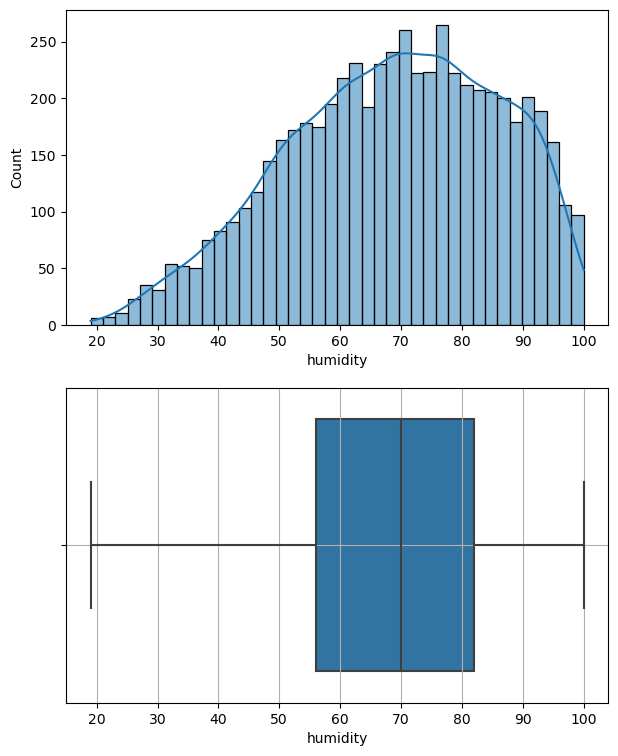

In [66]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(7,9))
plt.subplot(2,1,1)
sns.histplot(x = 'humidity', data = data, bins = 40, kde = True)

plt.subplot(2,1,2)
sns.boxplot(x = 'humidity', data = data)
plt.grid()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

56 ~ 82퍼에 많이 분포

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

가시성, 앞이 얼마나 잘 보이는지 

2. 변수가 수치형인지 범주형인지


In [98]:
#변수의 자료형을 확인해보세요.
var = 'visibility'
# row 생략 없이 출력
pd.set_option('display.max_rows', 10)
print(data[var].info())
print(data[var].head())
print(data[var].value_counts())

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: visibility
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB
None
0    2000
1    2000
2    2000
3    2000
4    2000
Name: visibility, dtype: int64
2000    4218
1996       8
1984       7
1992       7
1997       6
        ... 
1756       1
313        1
848        1
1406       1
1250       1
Name: visibility, Length: 1032, dtype: int64


수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [99]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
print(data[var].value_counts())
print()
print(data.isnull().sum())

2000    4218
1996       8
1984       7
1992       7
1997       6
        ... 
1756       1
313        1
848        1
1406       1
1250       1
Name: visibility, Length: 1032, dtype: int64

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
                ... 
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
Length: 11, dtype: int64


결측치 없음

4. 변수의 기초 통계량 확인

In [80]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

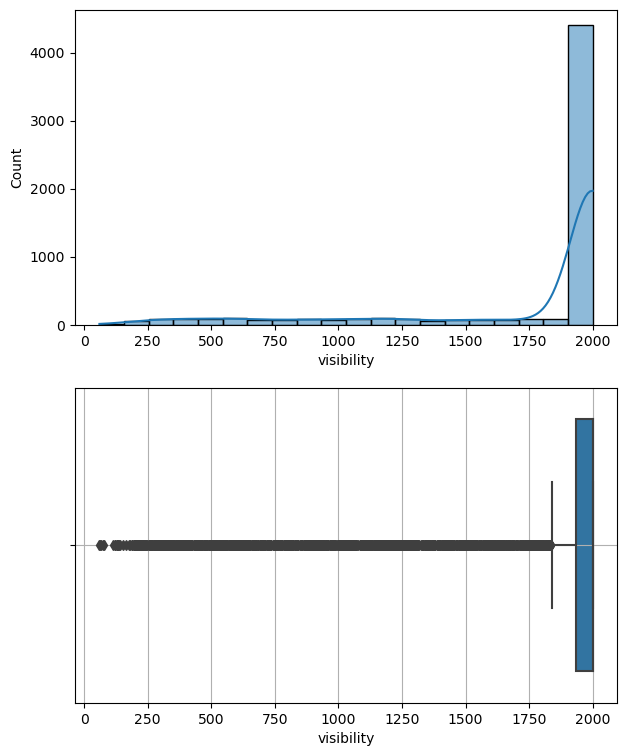

In [86]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(7,9))
plt.subplot(2,1,1)
sns.histplot(x = var, data = data, bins = 20, kde = True)

plt.subplot(2,1,2)
sns.boxplot(x = var, data = data)
plt.grid()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

대부분의 값이 2000 이며
1935~2000 이 75%

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

오존 수치

2. 변수가 수치형인지 범주형인지


In [266]:
#변수의 자료형을 확인해보세요.
var = 'ozone'
print(data[var].info())
print(data[var].head())

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: ozone
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB
None
0    0.002
1    0.003
2    0.023
3    0.028
4    0.008
Name: ozone, dtype: float64


수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [267]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
print(data[var].value_counts())
print()
print(data.isnull().sum())
print()
print(data[data[var].isnull()])

0.002    177
0.031    170
0.034    162
0.029    161
0.032    160
        ... 
0.115      1
0.099      1
0.116      1
0.110      1
0.106      1
Name: ozone, Length: 110, dtype: int64

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

Empty DataFrame
Columns: [date, hour, PM10, PM2.5, ozone, temperature, precipitation, windspeed, humidity, visibility, count]
Index: []


In [115]:
data[var].fillna(data[var].mean(), inplace= True)
print(data.isnull().sum())

date               0
hour               0
PM10             102
PM2.5             95
ozone              0
                ... 
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
Length: 11, dtype: int64


In [268]:
data[var].describe()

count    5827.000000
mean        0.031811
std         0.018075
min         0.001000
25%         0.020000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

4. 변수의 기초 통계량 확인

In [130]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5725.000000
mean       31.970655
std        42.987292
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

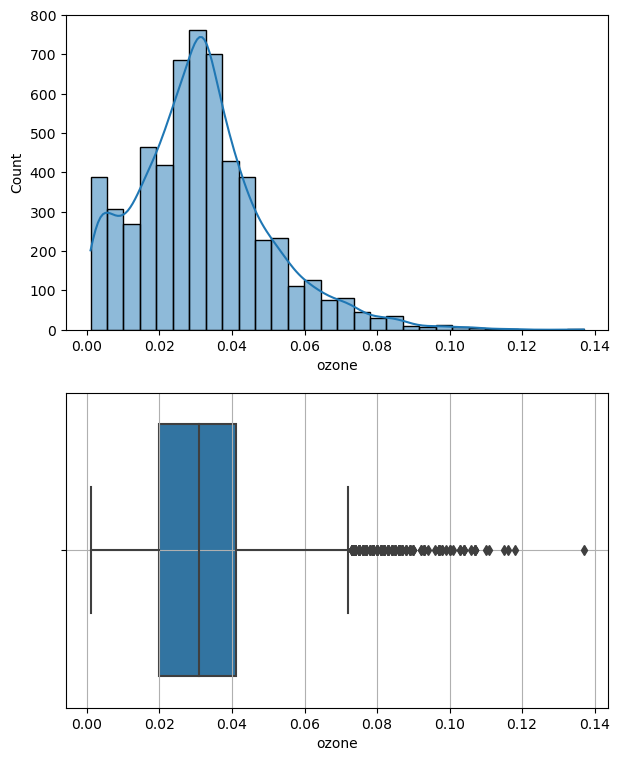

In [117]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(7,9))
plt.subplot(2,1,1)
sns.histplot(x = var, data = data, bins = 30, kde = True)

plt.subplot(2,1,2)
sns.boxplot(x = var, data = data)
plt.grid()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

0.02 ~ 0.04 에 많이 분포

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

미세먼지 수치
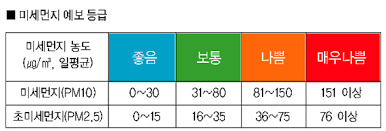

2. 변수가 수치형인지 범주형인지


In [119]:
#변수의 자료형을 확인해보세요.
var = 'PM10'
print(data[var].info())
print(data[var].head())

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
5725 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB
None
0    42.0
1    41.0
2    30.0
3    27.0
4    29.0
Name: PM10, dtype: float64


수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [131]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
print(data[var].value_counts())
print()
print(data.isnull().sum())

18.0     181
22.0     179
20.0     177
16.0     174
23.0     173
        ... 
296.0      1
373.0      1
433.0      1
479.0      1
332.0      1
Name: PM10, Length: 189, dtype: int64

date               0
hour               0
PM10             102
PM2.5             95
ozone              0
                ... 
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
Length: 11, dtype: int64


In [132]:
data[var].fillna(data[var].mean(), inplace= True)
print(data.isnull().sum())

date              0
hour              0
PM10              0
PM2.5            95
ozone             0
                 ..
precipitation     0
windspeed         0
humidity          0
visibility        0
count             0
Length: 11, dtype: int64


In [134]:
data[var].describe()

count    5827.000000
mean       31.970655
std        42.609325
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

4. 변수의 기초 통계량 확인

In [124]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5725.000000
mean       31.970655
std        42.987292
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

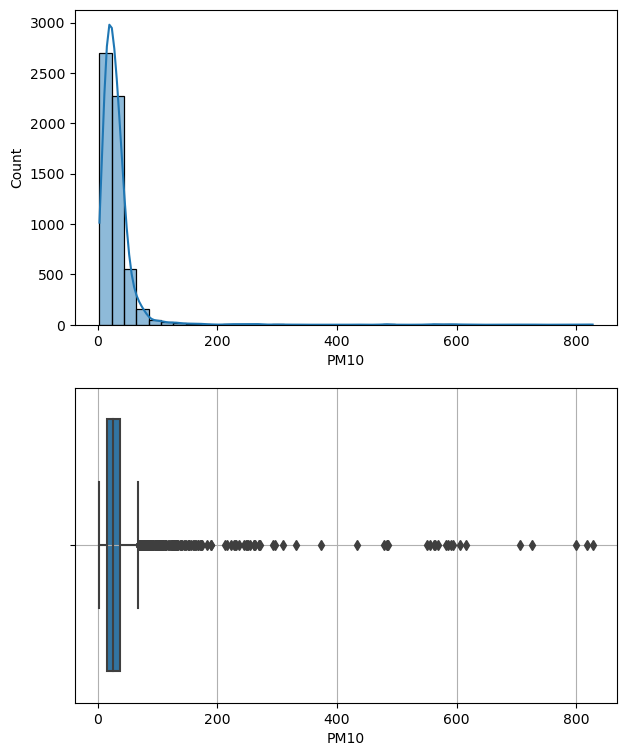

In [133]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(7,9))
plt.subplot(2,1,1)
sns.histplot(x = var, data = data, bins = 40, kde = True)

plt.subplot(2,1,2)
sns.boxplot(x = var, data = data)
plt.grid()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

대부분 좋음과 보통 사이에 위치

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

초미세먼지 농도

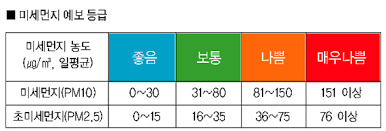

2. 변수가 수치형인지 범주형인지


In [135]:
#변수의 자료형을 확인해보세요.
var = 'PM2.5'
print(data[var].info)
print(data[var].head())

<bound method Series.info of 0       21.0
1       21.0
2       13.0
3       12.0
4       14.0
        ... 
5822    58.0
5823    56.0
5824    41.0
5825    35.0
5826    31.0
Name: PM2.5, Length: 5827, dtype: float64>
0    21.0
1    21.0
2    13.0
3    12.0
4    14.0
Name: PM2.5, dtype: float64


수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [139]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
print(data[var].value_counts())
print()
print(data.isnull().sum())

5.0      265
7.0      262
11.0     259
12.0     256
13.0     255
        ... 
115.0      1
117.0      1
106.0      1
86.0       1
82.0       1
Name: PM2.5, Length: 110, dtype: int64

date              0
hour              0
PM10              0
PM2.5            95
ozone             0
                 ..
precipitation     0
windspeed         0
humidity          0
visibility        0
count             0
Length: 11, dtype: int64


In [140]:
data[var].fillna(data[var].mean(), inplace= True)
print(data.isnull().sum())
print(data[var].describe())

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
                ..
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
Length: 11, dtype: int64
count    5827.000000
mean       15.666609
std        13.737597
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64


4. 변수의 기초 통계량 확인

In [137]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5732.000000
mean       15.666609
std        13.850990
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

5. 변수의 분포 확인

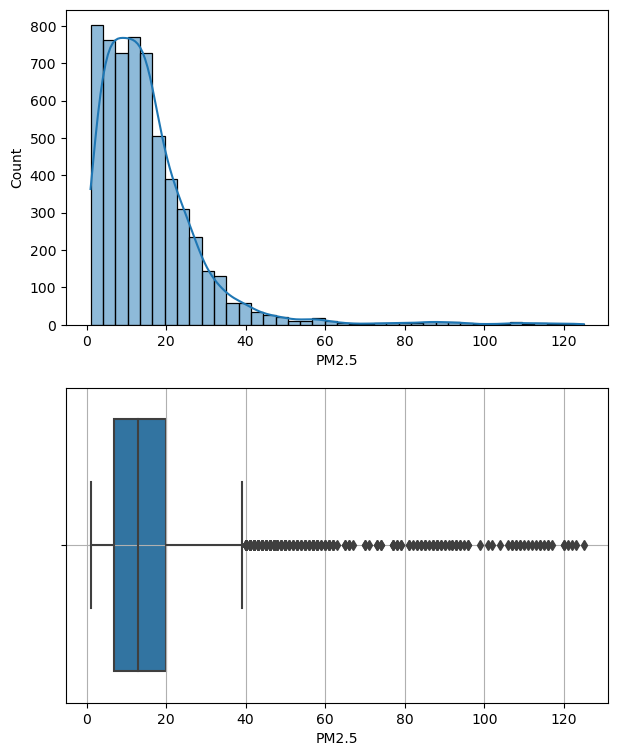

In [142]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(7,9))
plt.subplot(2,1,1)
sns.histplot(x = var, data = data, bins = 40, kde = True)

plt.subplot(2,1,2)
sns.boxplot(x = var, data = data)
plt.grid()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

대부분 좋음~보통에 위치

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

따릉이 대여 수

2. 변수가 수치형인지 범주형인지


In [145]:
#변수의 자료형을 확인해보세요.
target = 'count'
print(data[target].info())
print(data[target].head())

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: count
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB
None
0    46
1    40
2    31
3    12
4    30
Name: count, dtype: int64


수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [147]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
pd.set_option('display.max_rows', 20)
print(data[var].value_counts())
print()
print(data.isnull().sum())

5.0      265
7.0      262
11.0     259
12.0     256
13.0     255
        ... 
71.0       1
102.0      1
115.0      1
117.0      1
82.0       1
Name: PM2.5, Length: 111, dtype: int64

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64


결측치 없음

4. 변수의 기초 통계량 확인

In [148]:
#변수의 기초 통계량을 확인해보세요
data[target].describe()

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

5. 변수의 분포 확인

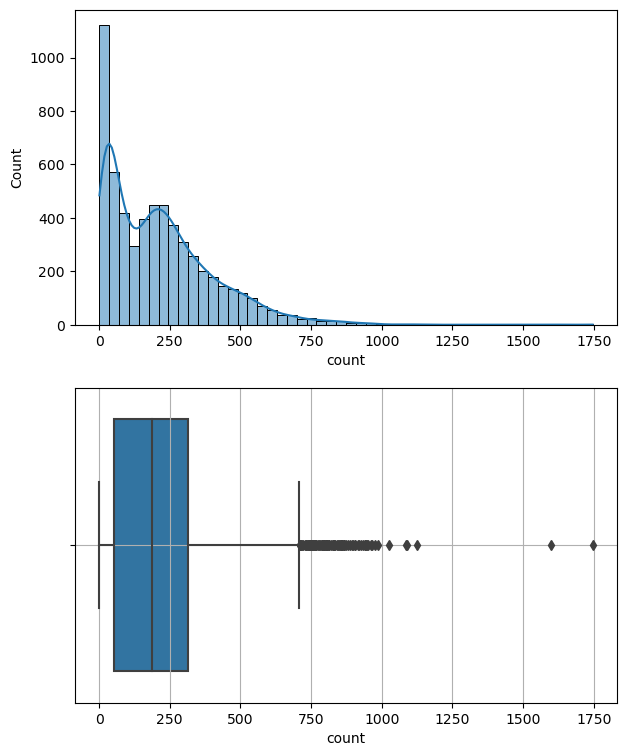

In [151]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(7,9))
plt.subplot(2,1,1)
sns.histplot(x = target, data = data, bins = 30, kde = True)

plt.subplot(2,1,2)
sns.boxplot(x = target, data = data)
plt.grid()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

In [159]:
target = 'count'
data.head(0)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


1. 강수 여부와 따릉이 대여량간 이변량 분석

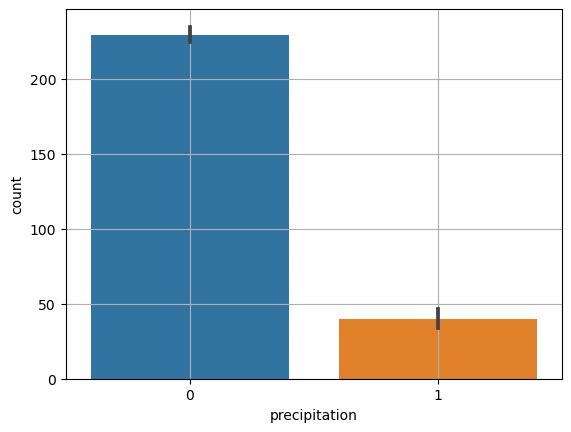

In [158]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
# 평균비교
sns.barplot(x='precipitation', y='count', data=data)
plt.grid()
plt.show()

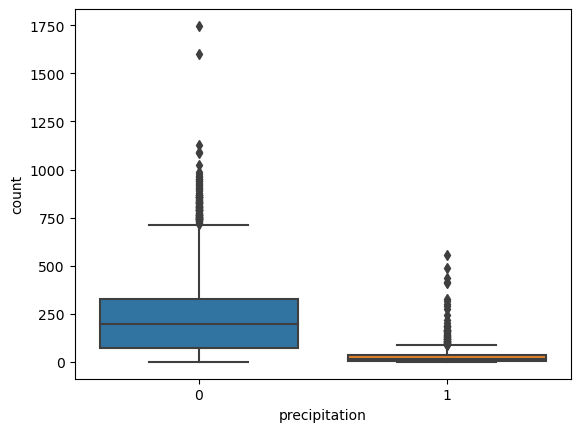

In [160]:
sns.boxplot(x='precipitation', y='count', data = data)
plt.show()

In [179]:
# 두 그룹으로 데이터 저장
noRain = data.loc[data['precipitation']==0, target]
rain = data.loc[data['precipitation']==1, target]

In [180]:
spst.ttest_ind(noRain, rain)

Ttest_indResult(statistic=21.389614151911022, pvalue=8.86239184041254e-98)

매우매우 강한 상관관계

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [161]:
#데이터 타입에 주의하여 이변량 분석을 
var2= 'hour'

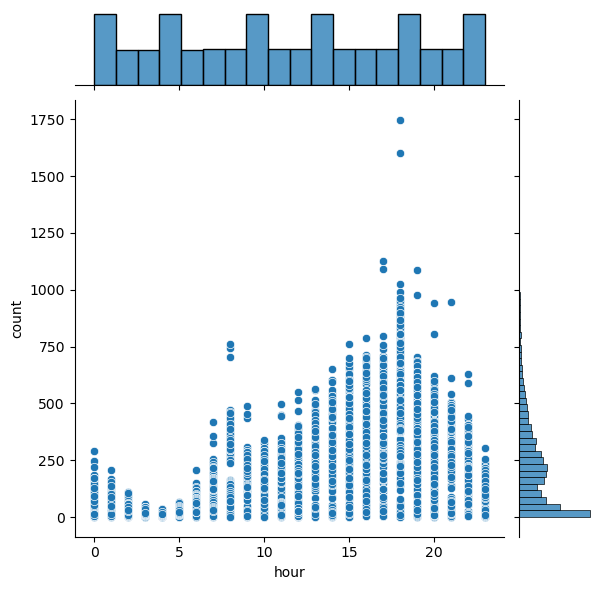

In [163]:
sns.jointplot(x=var2, y=target, data=data)
plt.show()

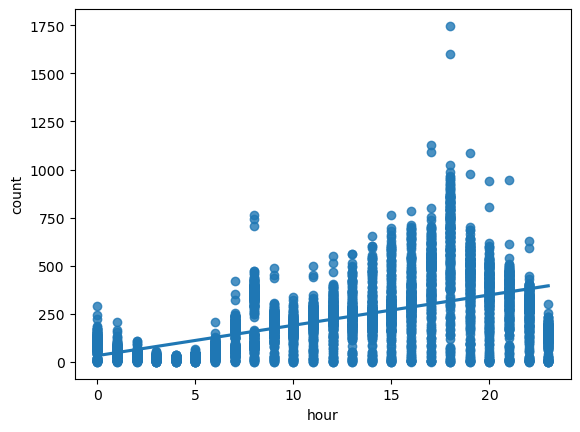

In [164]:
sns.regplot(x=var2, y=target, data = data)
plt.show()

In [165]:
# 상관계수와 p-value 
spst.pearsonr(data[var2], data[target])

PearsonRResult(statistic=0.5864350283919393, pvalue=0.0)

3. 온도 데이터와 따릉이 대여량간 분석

In [166]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
var3 = 'temperature'

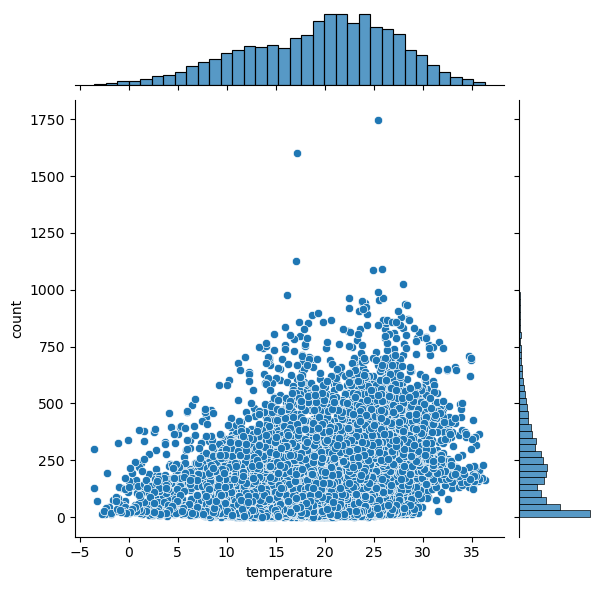

In [167]:
sns.jointplot(x=var3, y=target, data=data)
plt.show()

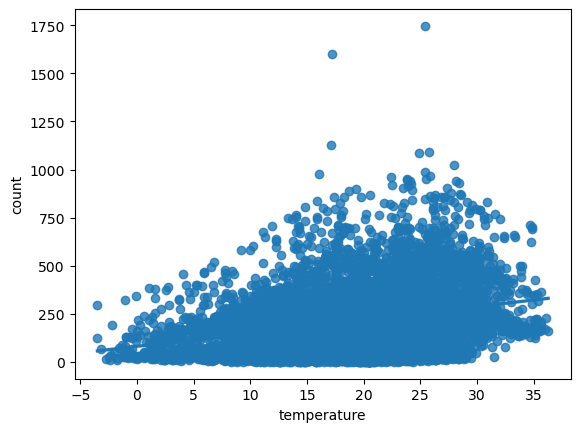

In [168]:
sns.regplot(x=var3, y=target, data = data)
plt.show()

In [170]:
spst.pearsonr(data[var3], data[target])

PearsonRResult(statistic=0.2771692363089791, pvalue=2.9405165551619465e-103)

4. 풍속 데이터와 따릉이 대여량간 분석

In [247]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
print(data.head(0))
var4 = 'windspeed'

Empty DataFrame
Columns: [date, hour, PM10, PM2.5, ozone, temperature, precipitation, windspeed, humidity, visibility, count]
Index: []


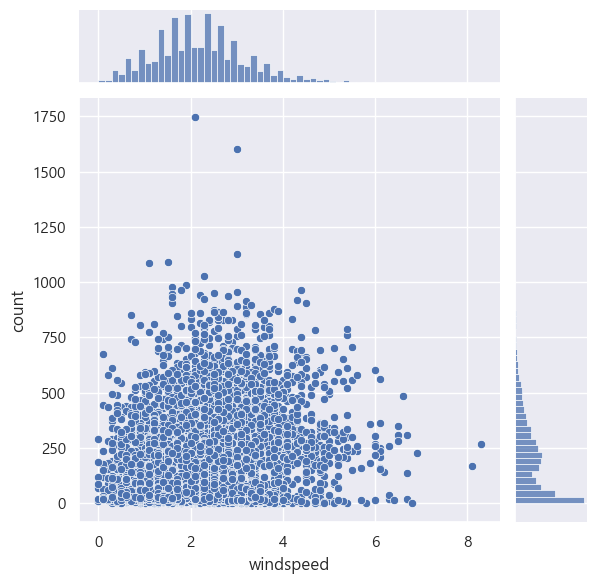

In [248]:
sns.jointplot(x=var4, y=target, data=data)
plt.show()

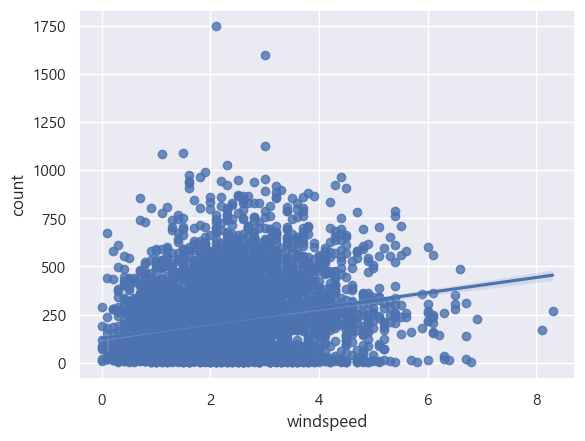

In [249]:
sns.regplot(x=var4, y=target, data = data)
plt.show()

In [250]:
spst.pearsonr(data[var4], data[target])

PearsonRResult(statistic=0.22372189900674888, pvalue=5.2433176782994606e-67)

5. 습도 데이터와 따릉이 대여량간 분석

In [13]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [262]:
print(data.head(0))
var5 = 'humidity'

Empty DataFrame
Columns: [date, hour, PM10, PM2.5, ozone, temperature, precipitation, windspeed, humidity, visibility, count]
Index: []


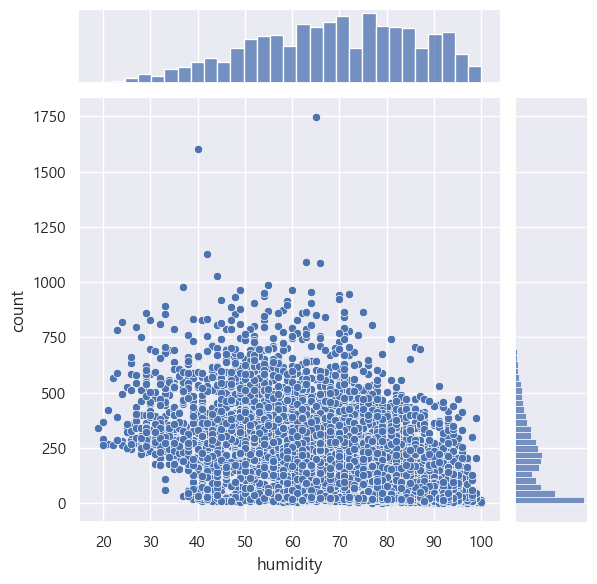

In [263]:
sns.jointplot(x=var5, y=target, data=data)
plt.show()

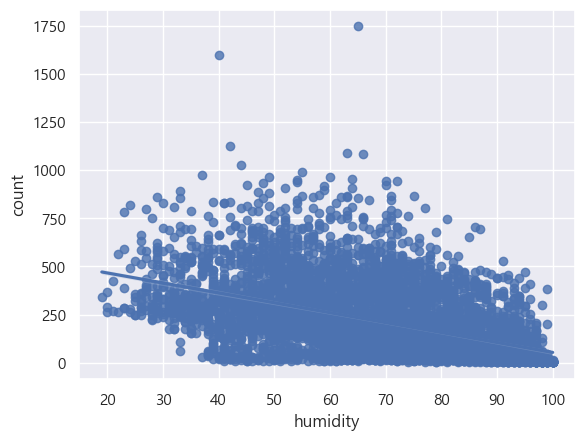

In [264]:
sns.regplot(x=var5, y=target, data = data)
plt.show()

In [265]:
spst.pearsonr(data[var5], data[target])

PearsonRResult(statistic=-0.4789554265904137, pvalue=0.0)

약한 상관관계

6. 시정 데이터와 따릉이 대여량간 분석

In [14]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [187]:
print(data.head(0))
var5 = 'visibility'

Empty DataFrame
Columns: [date, hour, PM10, PM2.5, ozone, temperature, precipitation, windspeed, humidity, visibility, count]
Index: []


In [210]:
def makePlot(x, y, data):
    print(spst.pearsonr(data[var4], data[target]))
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,1)
    sns.jointplot(x=x, y=y, data=data)
    
    plt.subplot(2,2,2)
    sns.regplot(x=x, y=y, data = data)
    plt.show()

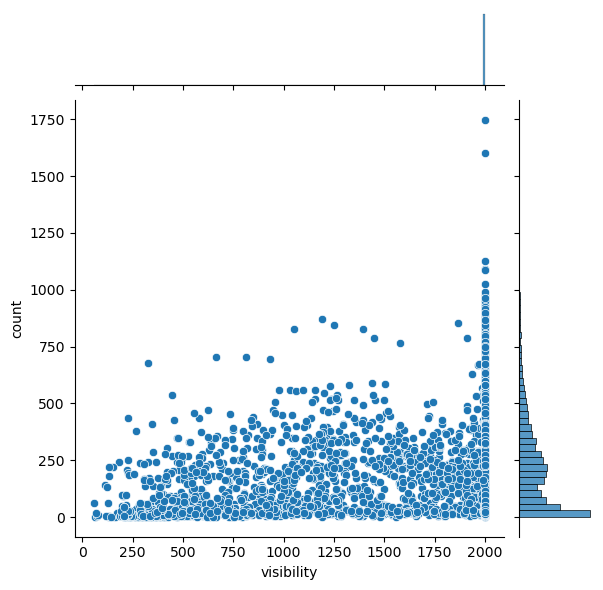

In [212]:
sns.jointplot(x=var5, y=target, data=data)
plt.show()

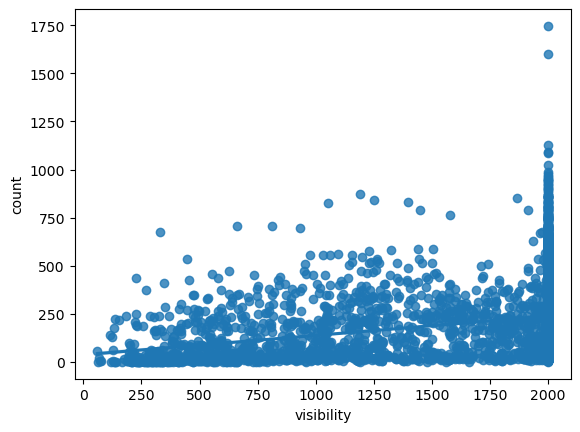

In [213]:
sns.regplot(x=var5, y=target, data = data)
plt.show()

In [215]:
spst.pearsonr(data[var5], data[target])

PearsonRResult(statistic=0.26582778327488765, pvalue=7.876003852900128e-95)

7. 오존 데이터와 따릉이 대여량간 분석

In [15]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [238]:
print(data.head(0))
var7 = 'ozone'

Empty DataFrame
Columns: [date, hour, PM10, PM2.5, ozone, temperature, precipitation, windspeed, humidity, visibility, count]
Index: []


PearsonRResult(statistic=0.3143572310359726, pvalue=8.11221301182502e-134)


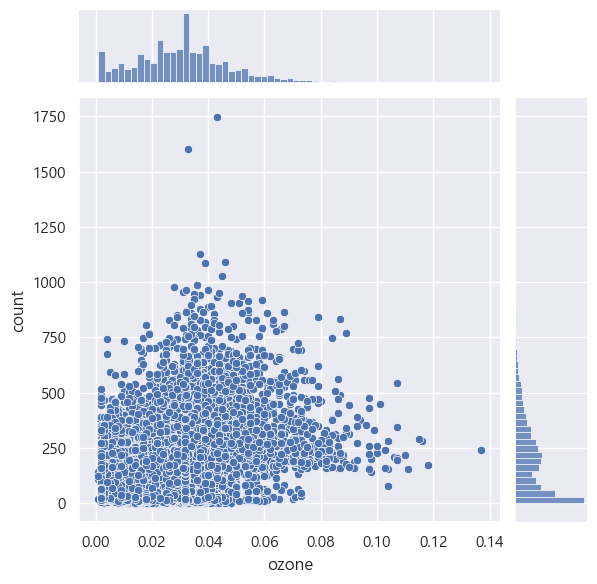

In [251]:
print(spst.pearsonr(data[var7], data[target]))
sns.jointplot(x=var7, y=target, data=data)
plt.show()

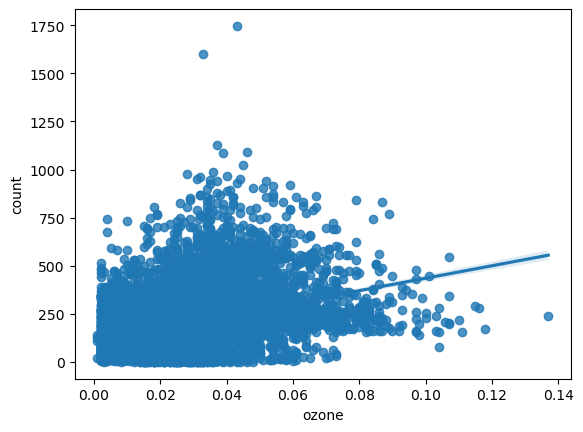

In [240]:
sns.regplot(x=var7, y=target, data = data)
plt.show()

In [241]:
spst.pearsonr(data[var7], data[target])

PearsonRResult(statistic=0.3143572310359726, pvalue=8.11221301182502e-134)

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [228]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
print(data.head(0))
var8 = 'PM10'

Empty DataFrame
Columns: [date, hour, PM10, PM2.5, ozone, temperature, precipitation, windspeed, humidity, visibility, count]
Index: []


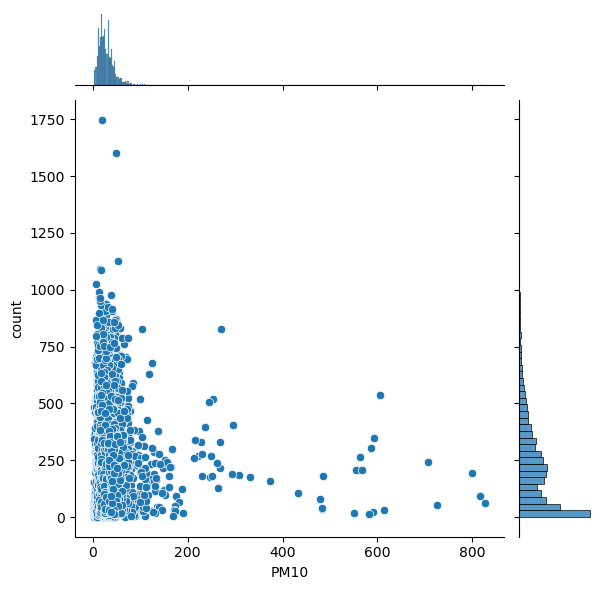

In [229]:
sns.jointplot(x=var8, y=target, data=data)
plt.show()

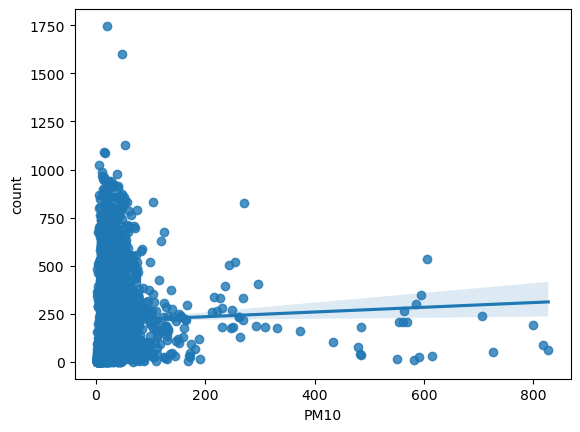

In [230]:
sns.regplot(x=var8, y=target, data = data)
plt.show()

In [231]:
spst.pearsonr(data[var8], data[target])

PearsonRResult(statistic=0.028116373132464983, pvalue=0.03185533353284909)

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [17]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [234]:
print(data.head(0))
var9 = 'PM2.5'

Empty DataFrame
Columns: [date, hour, PM10, PM2.5, ozone, temperature, precipitation, windspeed, humidity, visibility, count]
Index: []


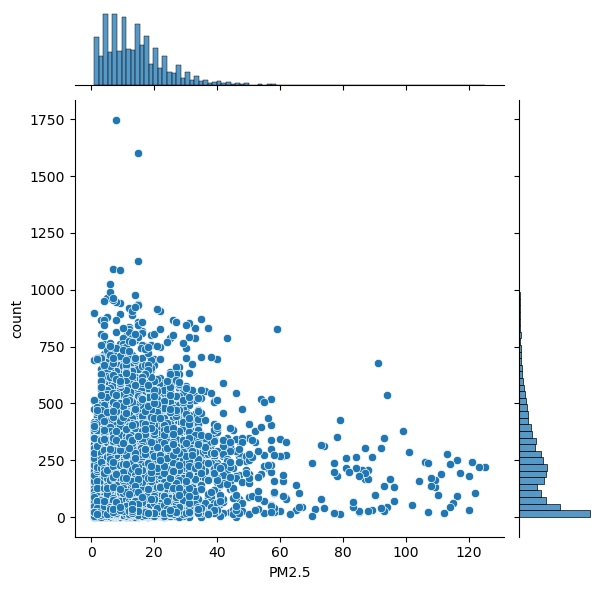

In [235]:
sns.jointplot(x=var9, y=target, data=data)
plt.show()

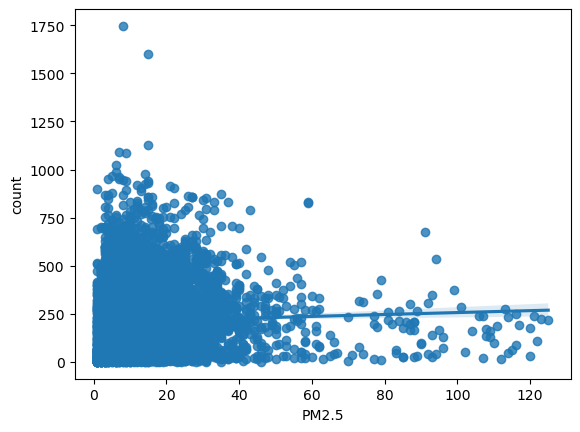

In [236]:
sns.regplot(x=var9, y=target, data = data)
plt.show()

In [237]:
spst.pearsonr(data[var9], data[target])

PearsonRResult(statistic=0.036960815647362394, pvalue=0.004776167075002825)

In [242]:
data.head(0)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


In [259]:
temp = data.iloc[:,[4,5,8,10]]
temp

,ozone,temperature,humidity,count
0,0.002,13.1,49,46
1,0.003,12.4,53,40
2,0.023,13.1,43,31
3,0.028,13.0,44,12
4,0.008,13.0,44,30
...,...,...,...,...
5822,0.002,9.3,66,273
5823,0.002,8.4,70,228
5824,0.002,8.6,70,215
5825,0.001,8.2,71,125


In [260]:
temp.corr()

,ozone,temperature,humidity,count
ozone,1.000000,0.524056,-0.400382,0.314357
temperature,0.524056,1.000000,-0.092162,0.277169
humidity,-0.400382,-0.092162,1.000000,-0.478955
count,0.314357,0.277169,-0.478955,1.000000


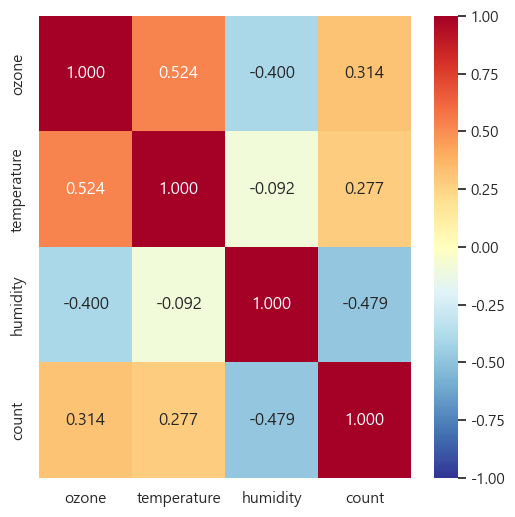

In [261]:
plt.figure(figsize = (6, 6))

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  
sns.heatmap(temp.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

In [244]:
data.corr()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
hour,1.000000,0.044041,0.049619,0.224591,0.190606,-0.000085,0.220301,-0.304287,0.088881,0.586435
PM10,0.044041,1.000000,0.683945,0.008295,-0.126148,-0.093993,0.043105,-0.087737,-0.287157,0.028116
PM2.5,0.049619,0.683945,1.000000,0.049661,-0.109844,-0.132713,-0.135430,-0.034743,-0.431885,0.036961
ozone,0.224591,0.008295,0.049661,1.000000,0.524056,-0.077905,0.342435,-0.400382,0.135208,0.314357
temperature,0.190606,-0.126148,-0.109844,0.524056,1.000000,-0.040205,0.051311,-0.092162,0.143919,0.277169
precipitation,-0.000085,-0.093993,-0.132713,-0.077905,-0.040205,1.000000,0.045742,0.384594,-0.494057,-0.269859
windspeed,0.220301,0.043105,-0.135430,0.342435,0.051311,0.045742,1.000000,-0.292127,0.084418,0.223722
humidity,-0.304287,-0.087737,-0.034743,-0.400382,-0.092162,0.384594,-0.292127,1.000000,-0.487472,-0.478955
visibility,0.088881,-0.287157,-0.431885,0.135208,0.143919,-0.494057,0.084418,-0.487472,1.000000,0.265828
count,0.586435,0.028116,0.036961,0.314357,0.277169,-0.269859,0.223722,-0.478955,0.265828,1.000000


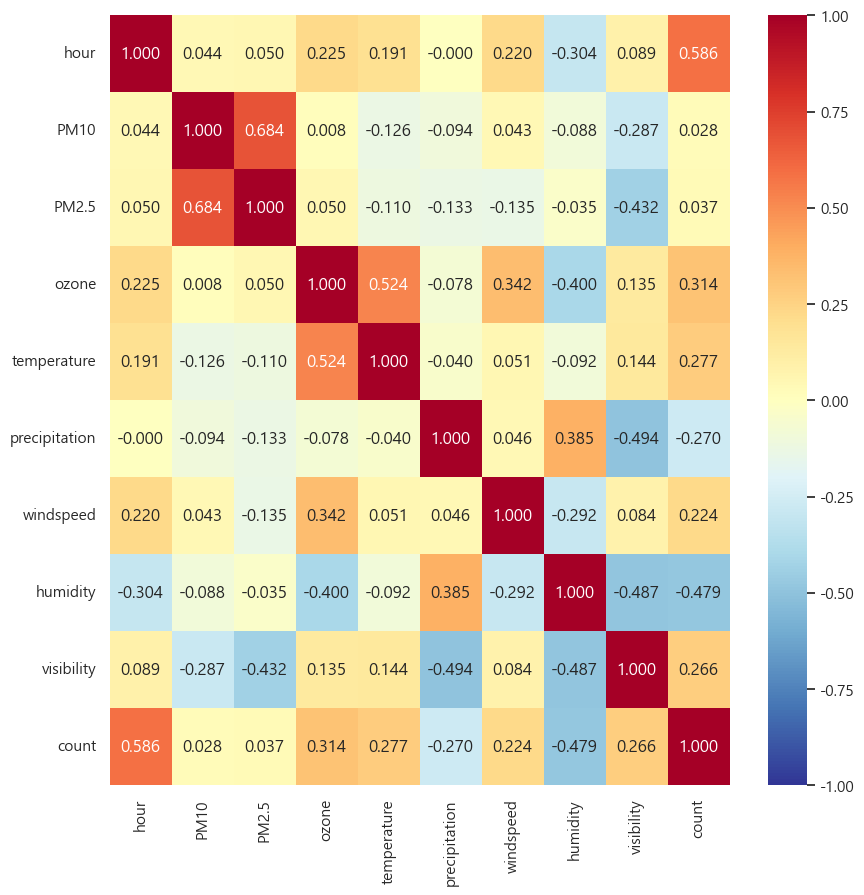

In [245]:
plt.figure(figsize = (10, 10))

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  
sns.heatmap(data.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

강우 여부
시간대

#### <font color='green'>2. 약한 관계의 변수</font>


온도
풍속
시정 데이터
오존

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


미세먼지
초미세먼지

### [Step6] Insight 도출